In [2]:
%matplotlib inline

In [301]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation
import re
from konlpy.tag import Okt
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

okt = Okt()

데이터 불러오기

In [319]:
data = pd.read_csv('new_mashed_up.csv')
len(data)

/Users/heeseok/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


116385

지역별 토픽 모델링을 위해 국민신문고,서울시응답소 데이터는 제외

In [395]:
smg= data[data.site_no==0]
eds = data[data.site_no==1]

In [396]:
len(data_),len(smg),len(eds)

(61606, 45980, 8799)

Kmeans클러스터링 시도

In [ ]:
#tf-idf행렬 만들기위해 단어집 불러오기
termLex = pd.read_csv('new_dictionary.csv')

Dictionary = defaultdict(lambda:-1)
for idx,pos in enumerate(termLex.dictionary):
    Dictionary[idx]=pos
    
V = termLex.vocabulary.to_list()

In [45]:
#노가다로 만든 불용어리스트
stop_words = ['말씀', '안녕', '서울','서울시', '관리','대한','대해','대하','민원','관련','경우',
             '해당','사항','내용','문의','진행','요청','확인','이용','개최','주민','처리','나라',
             '생각','여부','연락','주신','구정','구청','시간','부탁','조치','의견','관심','첨부파일',
              '관련','하십니까','애정','하십니까','주시','고객','안녕하십니까']

In [56]:
from sklearn.cluster import KMeans

tfidf = TfidfVectorizer(max_features=4000,sublinear_tf=True,stop_words=stop_words)
tf_idf_matrix = tfidf.fit_transform(data_.controlled_collection)

kmeans = KMeans(n_clusters = 10).fit(tf_idf_matrix)

In [58]:

from wordcloud import WordCloud

clusters=defaultdict(list)
p = re.compile(r'서울|서울시|관리|대한|사람|의견|대하|대해|시설|민원|관련|경우|해당|사항|내용|문의|불편|진행|피해|요청|확인|이용|설치|개최|주민|처리|나라|생각|여부|연락|주신|구정|구청|시간')
    

for i in range(len(data_)):
    clusters[kmeans.labels_[i]].append(''.join(p.sub('',data_.iloc[i].controlled_collection)))

temp = [(_[0],len(_[1])) for _ in clusters.items()]

for i in sorted(temp,key=lambda x:x[1], reverse=True):
    fuck = ' '.join(clusters[i[0]])
    wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',background_color='white').generate(fuck)
    print(' '.join([_[0] for _ in [(_[0],_[1]) for _ in wordcloud.words_.items()][0:2]]))

현재 운영
도로 공원
불법 주차 불법 정차
공사 건물
무단 투기 쓰레기
흡연 금연 구역
마을 버스 버스 노선
항동 지구 구로구
사업 시행 정비 사업
남녀공학 전환 중학교 신설


LDA 시도

In [323]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

In [335]:
stop_words = ['말씀', '안녕', '서울','서울시', '관리','대한','대해','대하','민원','관련','경우','가정','행복',
             '해당','사항','내용','문의','진행','요청','확인','이용','개최','주민','처리','나라','서울특별시',
             '생각','여부','연락','주신','구정','구청','시간','부탁','조치','의견','관심','첨부파일',
              '관련','하십니까','애정','하십니까','주시','고객','안녕하십니까','사람','시민','선생님','답변','신청',
             '기타','때문','현실','주무관','성심','성의껏','양해','다시','한번','다시한번','저희','때문','추후','질문',
             '어디','거기','여기','저기','실시','최선','먼저','성심껏','사진','사용','정말','문제','아래','불편','주시',
              '본인','업무','가정','행복','제발','정도','부분','읍니']

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

#titles = [' '.join([a for a in okt.nouns(_) if len(a)>1]) for _ in data_.title]

# tfidf = TfidfVectorizer(max_features=300,stop_words=stop_words,sublinear_tf=False)
# tf_idf_matrix = tfidf.fit_transform(titles)


# raw_tf = CountVectorizer(max_features=5000,stop_words=stop_words)
# raw_tf_matrix = raw_tf.fit_transform(data_.controlled_collection)

#숫자로된 단어는 제외하고 토픽 모델링 시도
num_removed=[re.sub('\d','',data_.controlled_collection.iloc[_]) for _ in range(len(data_.controlled_collection))]
raw_tf = CountVectorizer(max_features=5000,stop_words=set(stop_words))
raw_tf_matrix = raw_tf.fit_transform(num_removed)

최적의 토픽수를 정하기위해 토픽수를 바꿔가며 perplexity 측정.

In [328]:
temp = []

for i in range(1,100):

    lda = LatentDirichletAllocation(n_components=i,learning_method='online',max_iter=10,
                                    doc_topic_prior=1, topic_word_prior=0.1)
    result = lda.fit_transform(raw_tf_matrix)
    terms = raw_tf.get_feature_names()
    get_topics(lda.components_,terms)
    perp = lda.perplexity(raw_tf_matrix)
    temp.append(perp)
    print(i,"preplexity : ",perp,'\n')

    


plt.plot(range(1,100),np.array(temp))

Topic 1: [('자전거', 12158.8), ('작업', 5661.0), ('하수', 5003.57), ('방역', 4799.92), ('냄새', 4575.36)]
Topic 2: [('공원', 22623.84), ('시설', 10521.51), ('아이', 9478.0), ('어린이', 8528.98), ('녹지', 5067.11)]
Topic 3: [('설치', 59058.92), ('안전', 14287.51), ('사고', 9751.46), ('위치', 6383.79), ('횡단보도', 4808.64)]
Topic 4: [('아파트', 23506.55), ('버스', 16592.05), ('교통', 12465.71), ('마을', 7967.45), ('초등학교', 5803.02)]
Topic 5: [('건축', 23770.39), ('건물', 18119.38), ('허가', 13671.21), ('건축물', 13242.54), ('시설', 6948.01)]
Topic 6: [('지역', 11091.23), ('용산', 9334.31), ('용산구', 5857.19), ('구민', 5803.32), ('강서', 5351.0)]
Topic 7: [('정비', 7373.01), ('시정', 6831.77), ('거리', 6583.21), ('철거', 6483.2), ('불법', 6419.28)]
Topic 8: [('사업', 26832.06), ('계획', 18593.74), ('주택', 13315.44), ('시행', 10502.09), ('구역', 9351.14)]
Topic 9: [('어린이집', 9389.15), ('지원', 7938.53), ('아이', 6322.42), ('복지', 5538.15), ('장애인', 5071.55)]
Topic 10: [('과태료', 15088.97), ('부과', 12074.09), ('단속', 11507.57), ('과장', 10495.87), ('담배', 10111.59)]
Topic 11: [('주차', 2

KeyboardInterrupt: 

가장 결과가 잘 나온 모델

In [355]:
lda = LatentDirichletAllocation(n_components=21,learning_method='online',max_iter=15,
                                doc_topic_prior=1, topic_word_prior=0.1)
result = lda.fit_transform(raw_tf_matrix)
terms = raw_tf.get_feature_names()
get_topics(lda.components_,terms)
perp = lda.perplexity(raw_tf_matrix)
print("preplexity : ",perp)


Topic 1: [('도로', 43078.28), ('차량', 18513.62), ('통행', 15790.54), ('인도', 9898.89), ('교통', 8973.07)]
Topic 2: [('버스', 16602.46), ('마을', 8077.66), ('교통', 7128.51), ('노선', 5306.89), ('운행', 4676.11)]
Topic 3: [('지역', 9250.17), ('용산', 8588.64), ('구민', 8177.66), ('거리', 5815.01), ('용산구', 5396.09)]
Topic 4: [('도서관', 10096.64), ('운영', 9536.04), ('홈페이지', 6018.47), ('정보', 4521.34), ('인터넷', 3529.12)]
Topic 5: [('건물', 25299.47), ('공사', 13739.08), ('건축', 12150.74), ('피해', 10348.98), ('신축', 9178.54)]
Topic 6: [('과태료', 15562.08), ('부과', 12785.23), ('단속', 12709.28), ('담배', 9883.02), ('위반', 8531.97)]
Topic 7: [('조합', 9140.97), ('주택', 8802.41), ('등록', 6349.41), ('서류', 4741.83), ('자동차', 4720.95)]
Topic 8: [('신고', 21056.63), ('접수', 10832.17), ('부서', 9636.09), ('시정', 8504.26), ('현장', 7743.94)]
Topic 9: [('안내', 10427.67), ('과장', 6524.26), ('강서', 6015.7), ('결과', 5295.77), ('지도', 4406.81)]
Topic 10: [('주차', 75573.89), ('단속', 46828.63), ('불법', 32862.47), ('차량', 32423.13), ('주차장', 20513.9)]
Topic 11: [('보호', 6507.

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(1,22),result[0])

In [ ]:
cluster = [np.where(_==max(_))[0][0] for _ in result]
for i in range(21):
    print('topic',i+1,len([_ for _ in cluster if _==i]))

모델저장

In [370]:
from sklearn.externals import joblib

In [371]:
joblib.dump(lda,'minwon_lda.pkl')

['minwon_lda.pkl']

국민신문고,서울시응답소의 토픽번호는 999로, 나머지는 해당하는 토픽의 번호로 새로운 column 생성하여 저장

In [ ]:
data_['topic']=np.array(cluster)

In [394]:
pd.concat([data_,smg,eds],axis=0).to_csv('final_data.csv',header=True, index=False)

,site_no,site_index,title,date,view,question,part,ans_date,ans,collection,controlled_collection,topic
54779,2,8883,\n옆건물 공사로 인한 지반침하 및 건물균열\n\n,2010-05-31,234,\r\n옆건물 공사로 인한 지반침하와 건물균열이 발생하여 민원을 드립니다. \r신축...,도시환경국 주택과,2010-06-04,\r\n안녕하십니까? 곽현주님께서 삼성1동주민센터 및 새올전자민원창구에 게재하...,옆건물 공사로 인한 지반침하와 건물균열이 발생하여 민원을신축공사중인 건물과 피해건물...,건물 공사 지반침하 건물 균열 발생 민원 신축 공사 건물 피해 건물 아래 신축 공사...,5
54780,2,8887,\n세곡동 주민센터 위치안내에 대한 제안\n\n,2010-05-31,246,\r\n수고하십니다. 서울도시철도 8호선 복정역 직원 박인정입니다.\r 복정역은 지...,세곡동,2010-06-08,\r\n1. 바쁘신 가운데 저희 동 행정에 깊은 관심 감사드립니다. 2....,수고하십니다. 서울도시철도 8호선 복정역 직원 박인정복정역은 지하철 8호선과 분당선...,수고 서울 도시철도 호선 복정역 직원 인정 복정역 지하철 호선 분당선 환승역 용인 ...,2
54781,2,8879,\n폐쇄된 대모산등산진입로를 살려주세요\n\n,2010-05-29,232,\r\n대모산자연공원을 20년 넘게 아껴온 일원1동 주민입니다\r 얼마전부터 삼성병...,도시환경국 환경과,2010-06-08,\r\n참여마당 민원창구에 접수하신 귀하의 민원사항에 대하여 아래와 같이 회신합니다...,대모산자연공원을 20년 넘게 아껴온 일원1동 주민 얼마전부터 삼성병원외국인진료센터 ...,산자연 공원 20년 일원 주민 얼마 삼성 병원 외국인 진료 센터 신축 사안 표지판 ...,18
54782,2,8899,\n불법대수선으로 인한 사생활침해 예방요구\n\n,2010-06-01,276,\r\n구정에 진력하시는 구청장님의 노고에 감사드립니다.\r 귀청 온라인민원(민원...,도시환경국 건축과,2010-06-07,\r\n1. 평소 우리구 발전을 위하여 적극 협조하여 주신데 대하여 감사드립니다.2...,구정에 진력하시는 구청장님의 노고에귀청 온라인민원 민원인:강창남 접수번호:2008....,구정 진력 청장 노고 귀청 온라인 민원 민원 강창남 접수 번호 2008.111210...,5
54783,2,8901,\n강남구청 문화체육과 김동일님께\n\n,2010-06-01,299,\r\n강남구청 문화체육과 김동일님께.\r 안녕하세요.\r 강남스포츠문화센터 무선인...,복지문화국 문화체육과,2010-06-08,\r\n최성제 님 안녕하세요.먼저 민원사하에 대한 조치가 늦어져 대단히 죄송합니다....,강남구청 문화체육과 김동일님께.강남스포츠문화센터 무선인터넷설치로 5월 13일날 민원...,강남 구청 문화 체육 김동일 강남 스포츠 문화센터 무선인터넷 설치 5월 13일 민원...,12
54784,2,8911,\n논현동 57-23번지 증축에 대하여\n\n,2010-06-02,254,\r\n안녕하세요? 저는 논현동 57-23번지 증축공사에 대해 민원을 제기합니다.\...,도시환경국 건축과,2010-06-11,\r\n------------------------------------------...,저는 논현동 57-23번지 증축공사에 대해 민원을 제기1.소음 지난 1월부터 시작된...,논현동 57-23 번지 증축 공사 대해 민원 제기 소음 지난 1월 시작 공사 이웃 ...,5
54785,2,8881,"\n피부관리샵 ""비단"" 또 전광판 켜놓고 날리칩니다. 단속 바랍니다.\n\n",2010-05-30,265,"\r\n주소: 서울 강남구 신사동 636-14번지 피부관리샵 ""비단"" \r 돌출 불...",압구정동,2010-06-07,\r\n1. 평소 우리동에 깊은 관심을 가져주심에 깊이 감사드립니다. ...,주소: 서울 강남구 신사동 636-14번지 피부관리샵 비단 돌출 불법전광판 때문에 ...,주소 서울 강남구 신사동 636-14 번지 피부관리 비단 돌출 불법 전광판 때문 철...,19
54786,2,8918,\n철봉 교체 요청합니다\n\n,2010-06-03,207,\r\n안녕하십니까? 박시영이라고 합니다.\r 강남구청 치수과에서 양재천을 잘 관리...,교통안전국 치수방재과,2010-06-09,\r\n안녕하십니까? 구정발전을 위하여 좋은 의견을 주신 박시영님께 감사드...,안녕하십니까 박시영이라고강남구청 치수과에서 양재천을관리해주셔서 산책 달리기 하며유지...,안녕하십니까 박시영 강남 구청 치수 양재천 관리 산책 달리기 유지 최근 양재천 원두...,18
54787,2,8878,\n케익배송관련건\n\n,2010-05-29,268,\r\n답변 내용을 확인 하였읍니다.\r만약 크라운 베이커리(일원동지점)에서 콜밴으...,보건소 위생과,2010-06-03,\r\n1. 위생행정에 관심을 가져주시는 귀하께 감사를 드립니다. 2. ...,내용을 확인 하였읍니다. 만약 크라운 베이커리 일원동지점 에서 콜밴으로 배송하는상황...,내용 확인 읍니 만약 크라운 베이커리 일원동 지점 콜밴 배송 상황 휴대전화 촬영 읍...,4
54788,2,8889,\n논현동 고시원공사 민원 해결해주세요\n\n,2010-05-31,228,\r\n그동안 비공개로 민원을 올렸지만 해결이 안 되고 차일피일 시간을 보내며\r관...,도시환경국 건축과,2010-06-09,"\r\n1. 강남구 발전에 협조하여 주시는 이기현, 이혜옥님에게 감사드립니다. ...",그동안 비공개로 민원을 올렸지만 해결이되고 차일피일 시간을 보내며 관계공무원은 오히...,그동안 비공개 민원 해결 차일피일 시간 관계 공무원 오히려 건축 업자 통속 비호 민...,5


In [17]:
import matplotlib.pyplot as plt

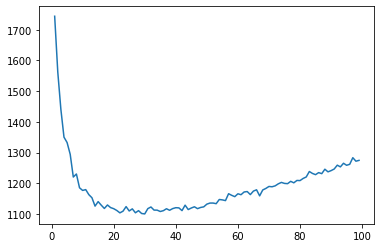

In [18]:
plt.plot(range(1,100),np.array(temp))

# 아래는 정리못한 노가다의 흔적들

In [17]:
import matplotlib.pyplot as plt

#plt.bar(range(1,6),result[3000])

In [83]:
for _ in data_[[_==2 for _ in [np.where(_==max(_))[0][0] for _ in result]]].question[:50]:
    print(_[:200])
    print('------------\n')

현재 서울 역세권은 !

1. 기존 용적률이 높은데도 낮은 건물이 수두룩
 
2. 역세권임으로 용적률을 상향적용할수 있는 지역이 수두룩
  
3. 1.의 경우는 토지주의 건축비 부담때문임으로
   시청에서 전체건물을 지어주되 절반은 공적주택으로 환수 (토지지분도)
   평당 건축제비용=500만원
   공적주택 확보비용=평당1000만원=전용+공용면적=8평=8
------------

2004년 도시계획위원회 회의록을 보십시요.
모든 조건상 3종지역인데 지금 2종으로 하고
나중에 3종 가능하다고
서울시 공무원이 대답했습니다
목동 123단지는 정부가 한 약속이행입니다. 당연하고 정상적인 행정처리이니
반드시 조건없이 3종으로 환원되야합니다
------------

혐오시설. 기피시설인근은 정부의 보상은 커녕
32년 코앞에서 소각장과 열병합발전소가 가동되온
123단지는 보상도 못받고 오히려
재산권침해를 받는 일이 
대한민국 하늘아래 14년간 진행되고 있습니다.
메뉴얼을 어긴 강제 2종하향으로 재산권침해가 막대합니다
3종환원과 소각장 이전으로 
그간의 희생
보상되야합니다
------------

목동 빼앗긴 3종 돌려주세요.
기부체납은 말도 않됩니다.
불공평한 행정으로 빼앗긴 재산권
 약속하신대로 회복해주십시요
------------

안녕하세요. 저는 동물 보호 활동을 하고 있으며 토끼를 오래 키워온 사람입니다.
식당 마당, 테마마크, 동물체험장의 작은 케이지 속 토끼들을 자주 보게 됩니다. 
대부분은 토끼의 습성을 고려하지 않은 환경 속에서 토끼들을 가두어 기르고 있습니다. 
토끼들은 이렇게 전시가 되어 아프거나 질병에 걸려도 방치되어 살아가고 있습니다.

서울시의 큰 공원도 많이 다
------------

경전철 목동선 역의 일부 위치가 잘못 된 것같아 글을 올립니다.

109번 오목교역과 110번 sbs 역이 500미터 이내로 무척 가깝습니다.

현재 목동 2,3,4단지에는 5천여 주민이 살고 있고, 재건축시 약 2배에 가까운 1만여 주민이 거주하게 될 것으로 

In [53]:
# lda = LatentDirichletAllocation(n_components=5,max_iter=20,learning_method='batch',
#                                 max_doc_update_iter=200,
#                                doc_topic_prior=1, topic_word_prior=0.1)

## a=1 , b=0.01 , K=6
### 1트
- Topic 1: [('차량', 319.7), ('주차', 312.39), ('단속', 297.13), ('불편', 256.8), ('신고', 251.25)]
- Topic 2: [('사업', 526.62), ('계획', 466.36), ('도시', 404.8), ('시행', 359.63), ('단지', 356.14)]
- Topic 3: [('위원회', 585.04), ('계획', 548.24), ('검토', 536.63), ('결정', 499.9), ('부서', 483.11)]
- Topic 4: [('도로', 307.49), ('주택', 256.88), ('아파트', 233.37), ('불법', 211.8), ('발전', 191.18)]
- Topic 5: [('주차', 749.95), ('단속', 661.05), ('차량', 491.68), ('불법', 468.37), ('도로', 413.82)]
- Topic 6: [('소음', 841.1), ('공사', 838.68), ('발생', 553.32), ('현장', 516.75), ('불편', 427.41)]
### 2트
- Topic 1: [('주차', 1045.56), ('차량', 876.26), ('단속', 856.12), ('불법', 774.7), ('도로', 553.98)]
- Topic 2: [('공사', 669.19), ('소음', 600.33), ('불편', 490.04), ('현장', 477.64), ('설치', 413.18)]
- Topic 3: [('쓰레기', 617.94), ('청소', 494.98), ('수거', 470.26), ('배출', 322.13), ('투기', 310.04)]
- Topic 4: [('계획', 831.84), ('단지', 718.86), ('도시', 713.78), ('지구', 600.95), ('결정', 586.77)]
- Topic 5: [('허가', 414.09), ('시행', 378.9), ('강남', 345.62), ('사업', 338.74), ('강남구', 336.06)]
- Topic 6: [('설치', 320.99), ('공원', 253.29), ('불편', 248.76), ('현재', 227.98), ('발생', 211.3)]

### 3트
- Topic 1: [('계획', 1021.18), ('도시', 856.73), ('단지', 795.49), ('사업', 731.8), ('검토', 634.95)]
- Topic 2: [('도로', 643.59), ('공사', 628.49), ('설치', 545.97), ('정비', 363.79), ('보도', 286.4)]
- Topic 3: [('소음', 742.18), ('차량', 713.04), ('단속', 608.2), ('주차', 554.31), ('불편', 553.14)]
- Topic 4: [('운영', 377.12), ('시설', 281.98), ('인권', 269.47), ('현재', 259.9), ('검토', 249.16)]
- Topic 5: [('주차', 595.42), ('불법', 392.45), ('불편', 352.71), ('단속', 344.53), ('설치', 279.19)]
- Topic 6: [('쓰레기', 687.77), ('청소', 557.95), ('수거', 489.81), ('투기', 433.05), ('무단', 409.03)]


## a=1 , b=0.01 , K=4
-tfidf = TfidfVectorizer(max_features=10000,stop_words=stop_words,sublinear_tf=True)

### 1트
- Topic 1: [('차량', 1010.89), ('주차', 966.33), ('도로', 818.34), ('공사', 802.92), ('불법', 730.56)]
- Topic 2: [('사업', 599.16), ('시행', 553.9), ('시설', 515.4), ('주택', 500.42), ('허가', 490.52)]
- Topic 3: [('쓰레기', 856.54), ('청소', 762.14), ('단속', 598.74), ('수거', 554.56), ('행정', 541.92)]
- Topic 4: [('운영', 563.53), ('아이', 378.19), ('센터', 354.45), ('지원', 349.58), ('직원', 347.1)]

### 2트
- Topic 1: [('계획', 1029.48), ('도시', 859.24), ('검토', 829.04), ('단지', 786.69), ('부서', 720.52)]
- Topic 2: [('공사', 1111.21), ('불편', 895.48), ('소음', 894.87), ('현장', 890.38), ('도로', 794.24)]
- Topic 3: [('설치', 498.61), ('교통', 497.13), ('아파트', 428.24), ('시설', 376.91), ('도로', 374.47)]
- Topic 4: [('쓰레기', 718.68), ('청소', 567.99), ('단속', 510.46), ('수거', 509.8), ('과태료', 466.31)]

### 3트
- Topic 1: [('공사', 1203.51), ('소음', 935.84), ('현장', 879.07), ('불편', 855.65), ('발생', 798.34)]
- Topic 2: [('차량', 733.59), ('주차', 672.29), ('불법', 655.95), ('단속', 599.18), ('지역', 550.99)]
- Topic 3: [('쓰레기', 805.62), ('청소', 669.87), ('수거', 544.62), ('센터', 533.86), ('행정', 382.64)]
- Topic 4: [('계획', 758.37), ('도시', 733.22), ('단지', 715.06), ('단속', 620.87), ('지구', 597.33)]


## a=1 , b=0.01 , K=4
-tfidf = TfidfVectorizer(max_features=10000,stop_words=stop_words,sublinear_tf=False)

### 1트
- Topic 1: [('주차', 2204.94), ('단속', 1738.05), ('불법', 1166.29), ('차량', 909.39), ('정차', 637.72)]
- Topic 2: [('공사', 1552.01), ('소음', 1321.18), ('도로', 1047.2), ('불편', 866.68), ('현장', 776.46)]
- Topic 3: [('쓰레기', 636.53), ('신청', 414.85), ('센터', 395.16), ('지원', 345.74), ('시설', 320.56)]
- Topic 4: [('계획', 1347.93), ('도시', 961.96), ('단지', 898.93), ('사업', 883.98), ('건축', 744.77)]

### 2트
- Topic 1: [('주차', 2051.35), ('단속', 1112.62), ('차량', 986.56), ('불법', 937.9), ('도로', 742.1)]
- Topic 2: [('공사', 1641.15), ('소음', 1163.76), ('설치', 645.2), ('건축', 630.25), ('도로', 595.26)]
- Topic 3: [('쓰레기', 1201.34), ('청소', 818.98), ('수거', 670.17), ('단속', 659.78), ('투기', 584.12)]
- Topic 4: [('계획', 1346.13), ('도시', 959.83), ('사업', 908.9), ('단지', 888.94), ('검토', 728.02)]

### 3트
- Topic 1: [('설치', 1238.72), ('공원', 812.18), ('도로', 768.92), ('시설', 683.39), ('주차', 671.05)]
- Topic 2: [('단속', 1575.04), ('공사', 1432.59), ('소음', 1346.37), ('주차', 1221.71), ('쓰레기', 1191.74)]
- Topic 3: [('사업', 662.0), ('시행', 548.55), ('주택', 514.23), ('신청', 452.58), ('조합', 418.08)]
- Topic 4: [('계획', 1073.27), ('단지', 861.4), ('도시', 739.06), ('버스', 687.09), ('지구', 661.67)]

### 4트
- Topic 1: [('계획', 1340.33), ('도시', 957.59), ('단지', 886.34), ('주차', 879.03), ('사업', 819.85)]
- Topic 2: [('공사', 1447.56), ('소음', 1199.35), ('발생', 537.47), ('현장', 535.22), ('건물', 511.3)]
- Topic 3: [('설치', 594.36), ('조합', 417.69), ('주택', 389.58), ('도서관', 388.84), ('센터', 388.0)]
- Topic 4: [('단속', 1446.19), ('주차', 1273.14), ('쓰레기', 1193.83), ('불법', 925.22), ('청소', 806.34)]

## a=0.5 , b=0.01 , K=5
-tfidf = TfidfVectorizer(max_features=10000,stop_words=stop_words,sublinear_tf=False)


### 1트
- Topic 1: [('공사', 1755.27), ('소음', 1377.46), ('도로', 938.52)]
- Topic 2: [('주택', 583.64), ('구역', 455.61), ('인권', 446.95)]
- Topic 3: [('공원', 829.86), ('자전거', 610.62), ('시설', 558.53)]
- Topic 4: [('계획', 1341.13), ('도시', 943.18), ('단지', 894.75)]
- Topic 5: [('주차', 2322.3), ('단속', 1853.07), ('불법', 1309.81)]
### 2트
- Topic 1: [('공사', 1709.72), ('소음', 1377.46), ('설치', 1225.23), ('도로', 961.06), ('공원', 870.48)]
- Topic 2: [('계획', 1125.66), ('단지', 771.37), ('도시', 722.34), ('지구', 678.58), ('사업', 594.02)]
- Topic 3: [('주택', 676.66), ('건축', 589.21), ('건축물', 455.59), ('조합', 425.01), ('건물', 416.74)]
- Topic 4: [('자전거', 570.08), ('직원', 512.47), ('전화', 371.8), ('영업', 370.71), ('담배', 337.58)]
- Topic 5: [('주차', 2322.42), ('단속', 1814.06), ('차량', 1244.21), ('불법', 1235.12), ('쓰레기', 1206.7)]
### 3트
- Topic 1: [('공사', 1386.38), ('소음', 1377.42), ('피해', 634.87), ('발생', 619.19), ('현장', 577.35)]
- Topic 2: [('계획', 1068.7), ('단지', 814.47), ('사업', 760.05), ('도시', 743.45), ('지구', 638.1)]
- Topic 3: [('주차', 2290.15), ('단속', 1805.97), ('차량', 1305.43), ('불법', 1296.65), ('쓰레기', 1206.63)]
- Topic 4: [('설치', 1168.89), ('도로', 922.64), ('공원', 832.95), ('자전거', 521.68), ('아파트', 465.73)]
- Topic 5: [('시설', 626.59), ('건축', 508.38), ('허가', 476.61), ('도서관', 457.08), ('인권', 446.95)]

## a=0.5 , b=0.01 , K=4
-tfidf = TfidfVectorizer(max_features=10000,stop_words=stop_words,sublinear_tf=False)

### 1트
- Topic 1: [('주차', 2323.38), ('차량', 1534.11), ('단속', 1519.9)]
- Topic 2: [('공원', 858.09), ('시설', 604.14), ('아이', 520.31)]
- Topic 3: [('공사', 1530.47), ('계획', 1343.73), ('소음', 1314.54)]
- Topic 4: [('쓰레기', 1206.7), ('청소', 828.16), ('수거', 672.94)]
### 2트
- Topic 1: [('주차', 740.34), ('버스', 687.3), ('주차장', 510.22)]
- Topic 2: [('공사', 1741.76), ('소음', 1377.31), ('설치', 1363.71)]
- Topic 3: [('계획', 1356.3), ('사업', 1072.97), ('도시', 936.4)]
- Topic 4: [('단속', 1597.51), ('주차', 1571.49), ('불법', 1269.55)]
### 3트
- Topic 1: [('주차', 2319.73), ('공사', 1642.72), ('단속', 1629.03), ('차량', 1505.12), ('도로', 1442.25)]
- Topic 2: [('사업', 689.26), ('주택', 663.68), ('건축', 546.71), ('인권', 446.95), ('건축물', 444.04)]
- Topic 3: [('공원', 627.22), ('설치', 512.8), ('도서관', 457.08), ('담배', 433.03), ('시설', 374.31)]
- Topic 4: [('쓰레기', 1198.69), ('계획', 865.38), ('단지', 778.88), ('청소', 725.44), ('수거', 672.94)]


In [21]:
stop_words = ['말씀', '안녕', '서울','서울시', '관리','대한','대해','대하','민원','관련','경우',
             '해당','사항','내용','문의','진행','요청','확인','이용','개최','주민','처리','나라',
             '생각','여부','연락','주신','구정','구청','시간','부탁','조치','의견','관심','첨부파일',
              '관련','하십니까','애정','하십니까','주시','고객','안녕하십니까','사람','시민','선생님','000']

from sklearn.feature_extraction.text import CountVectorizer
raw_tf = CountVectorizer(max_features=10000,stop_words=stop_words)

raw_tf_matrix = raw_tf.fit_transform(data_.controlled_collection)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=4,max_iter=10,learning_method='batch',
                                max_doc_update_iter=100,
                               doc_topic_prior=0.5, topic_word_prior=0.1)

result = lda.fit_transform(raw_tf_matrix)



terms = raw_tf.get_feature_names()

def get_topics(components, feature_names, n=3):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

Topic 1: [('공원', 21288.19), ('시설', 19766.04), ('계획', 18933.19)]
Topic 2: [('공사', 48066.32), ('소음', 30766.25), ('설치', 28844.93)]
Topic 3: [('주차', 69646.86), ('단속', 54342.93), ('차량', 46822.28)]
Topic 4: [('사업', 26123.66), ('계획', 19813.49), ('건축', 19473.24)]


<BarContainer object of 10 artists>

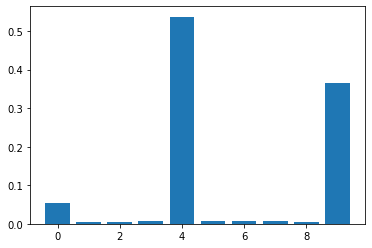

In [237]:
import matplotlib.pyplot as plt

plt.bar(range(10),result[4])

In [218]:
# cluster = [np.where(_==max(_))[0][0] for _ in result]

# clusters=defaultdict(list)
# p = re.compile(r'하십니까|말씀|안녕|서울|서울시|사람|관리|대한|대하|대해|시설|민원|\
# |경우|해당|사항|내용|문의|불편|진행|피해|요청|확인|이용|설치|개최|주민|처리|나라|생각|여부|연락|주신|구정|구청|시간|부탁|조치|의견|관심|첨부파일|관련')

# for i in range(len(data201905)):
#     clusters[cluster[i]].append(''.join(p.sub('',data201905.iloc[i].controlled_collection)))
# #    clusters[cluster[i]].append(''.join(data201905.iloc[i].controlled_collection))

# temp = [(_[0],len(_[1])) for _ in clusters.items()]
# for i in sorted(temp,key=lambda x:x[1], reverse=True):
#     fuck = ' '.join(clusters[i[0]])
#     wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',background_color='white').generate(fuck)
#     print(' '.join([_[0] for _ in [(_[0],_[1]) for _ in wordcloud.words_.items()][3:0:-1]]))

<BarContainer object of 5 artists>

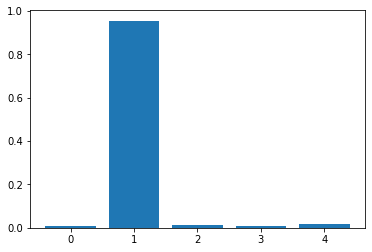

In [183]:
import matplotlib.pyplot as plt

plt.bar(range(5),result[2])

In [204]:
sorted(temp,key=lambda x:x[1], reverse=True)

[(1, 76),
 (17, 66),
 (14, 53),
 (19, 40),
 (8, 27),
 (13, 27),
 (11, 27),
 (2, 27),
 (4, 26),
 (0, 22),
 (7, 19),
 (6, 19),
 (9, 18),
 (18, 16),
 (5, 16),
 (3, 11),
 (16, 9),
 (15, 8),
 (12, 7),
 (10, 7)]

In [207]:
clusters[17]

['증산 스포츠 센터 출입구 기존 보안관 교차 교대 식사  출입구 비어 상황 발생 불구 재학생 수가 1000 이유 추가 증원 스포츠 센터 자 때문 폐쇄 증산 구역 재개발 추가 위험 요소 발생 제발 아이 안전  검토 시어 보안관 추가 증원  000000 은평구 증산 초등학교 학교 보안관 증원   현재 570 여개  공립 초등학교 학교 이상 200 여명 이상 학교 보안관 배치 운용 중하 한정 예산 학교 보안관 추가 배치 모든 학교 추가 배치 널리 이해해 시기 현재 로서 학교 보안관 추가 배치 증원 계획 추가 배치 학교 선정 학생 평가 항목 통해 결정 향후 추가 배치 계획 수립 000   검토 반영 노력 학교 보안관 사업 미비 개선 위해 노력 검토 부서 특별시 평생교육 교육 정책 02-2133 3919',
 ' 어디  0405 19 5-45 210 78 접수 불법 정차 단속   아래 사진 장만 시민 고제 요건 부합 과태료 부과  시민 고제 요건 보도 횡단보도 교차로 차선 이상 소화전 지상 소방차 통행 버스정류장 불법 정차 차량  07시 22시 사이 1분 간격 사진 위치 차량 번호 촬영 적발 일로 3일 스마트폰  신고 과태료 부과 지역 황색 실선 구간 이면 도로  주차  콜센터 1544-2113 신고 24 운영 현장     주차  홍문 3423-6454 전화 주시 성심껏 안내',
 '19년 05월 16일 야간 22시 25분 논현동 248-1 주변  신고 정차 위반 과태료 부과  신고 21시 10분 접수 22시 25분 지체  신고 대상  유무 주간 22시 도로 주변 도로 잠시 주차 5분 커피 주문 탑승 정차 위반 단속 주차  콜센터   신고 21시 10분 접수  단속 22시 25분 1 10분 이상 지체  대상  무조건 단속 차량  대상 단속 고함  단속  1 지체 단속 라면 단속 대상  22시 야간 차량 빈번 주변 도로 또한  단속 불구  신고 접수 지체 대상  단속 문제점 차라리  신고 접수 단속 수시 단속 위반 단속 위성 성함  핑계 처럼 보임 제기 불법 정차 단속

In [209]:
len(data.part.unique())

5996